In [35]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1A:

See code below

In [36]:
# Initializing datasets into two separate variables

storms = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv")
names = pd.read_csv("names.csv")

print(names.shape)
print(storms.shape)

# Take year from storms dataframe and append to names dataframe

(214, 2)
(11859, 14)


In [37]:
# Checking if storms dataframe has same amount of unique name in names dataframe

storms['name'].nunique()

214

In [38]:
storms = storms.groupby(['name', 'year']).mean().reset_index()
storms

/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_22221/3892791034.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,name,year,Unnamed: 0,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011993,1993,2985.5,5.75,8.750000,9.000000,24.687500,-78.050000,-1.000000,27.500000,1000.125000,NaN,NaN
1,AL012000,2000,5058.5,6.00,7.750000,9.000000,20.850000,-93.100000,-1.000000,25.000000,1009.250000,NaN,NaN
2,AL021992,1992,2799.0,6.00,25.600000,9.600000,26.660000,-84.480000,-1.000000,29.000000,1007.400000,NaN,NaN
3,AL021994,1994,3144.5,7.00,20.333333,9.333333,33.616667,-79.733333,-1.000000,24.166667,1015.833333,NaN,NaN
4,AL021999,1999,4848.5,7.00,2.750000,7.000000,20.425000,-96.400000,-1.000000,28.750000,1004.750000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Wilfred,2020,11689.5,9.00,19.000000,9.000000,13.235714,-36.914286,-0.214286,33.928571,1006.785714,87.142857,0.000000
508,Wilma,2005,7253.5,10.00,20.500000,9.363636,20.968182,-81.925000,2.204545,91.931818,954.181818,266.463415,86.585366
509,Zeta,2005,7356.5,12.00,30.500000,9.000000,25.087500,-37.025000,-0.125000,43.750000,1001.250000,186.250000,0.000000
510,Zeta,2006,7372.0,1.00,3.391304,8.608696,23.321739,-42.934783,-0.086957,45.652174,999.434783,141.521739,0.000000


In [39]:
storms_merged = pd.merge(storms, names, left_on=['name'], right_on=['Name'])

In [40]:
print(storms_merged.shape)

(512, 15)


In [41]:
storms_merged.head()

,name,year,Unnamed: 0,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,Name,Gender
0,AL011993,1993,2985.5,5.75,8.750000,9.000000,24.687500,-78.050000,-1.0,27.500000,1000.125000,NaN,NaN,AL011993,N
1,AL012000,2000,5058.5,6.00,7.750000,9.000000,20.850000,-93.100000,-1.0,25.000000,1009.250000,NaN,NaN,AL012000,N
2,AL021992,1992,2799.0,6.00,25.600000,9.600000,26.660000,-84.480000,-1.0,29.000000,1007.400000,NaN,NaN,AL021992,N
3,AL021994,1994,3144.5,7.00,20.333333,9.333333,33.616667,-79.733333,-1.0,24.166667,1015.833333,NaN,NaN,AL021994,N
4,AL021999,1999,4848.5,7.00,2.750000,7.000000,20.425000,-96.400000,-1.0,28.750000,1004.750000,NaN,NaN,AL021999,N


In [42]:
cleaned_storms = storms_merged[['Name', 'Gender', 'year']]
cleaned_storms.head()

,Name,Gender,year
0,AL011993,N,1993
1,AL012000,N,2000
2,AL021992,N,1992
3,AL021994,N,1994
4,AL021999,N,1999


### Question 1B:

See code and caption below

In [43]:
from plotnine import *

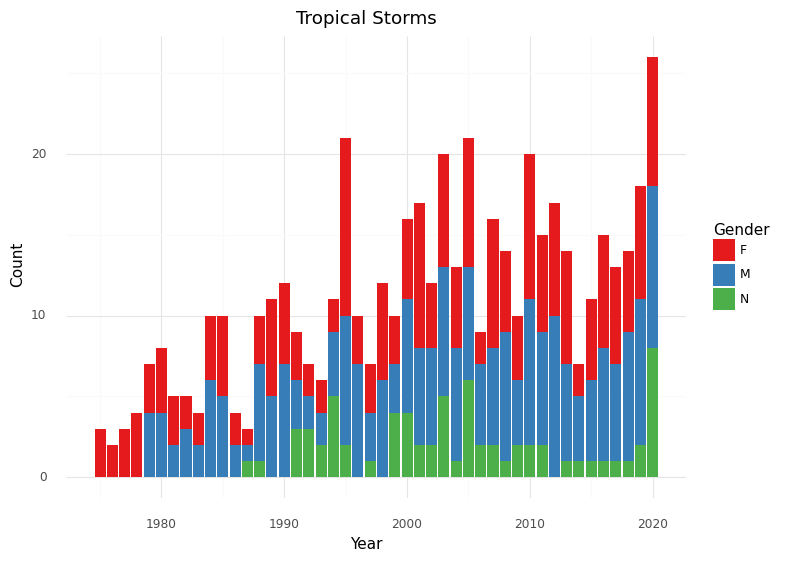

<ggplot: (8786841069758)>

In [134]:
stormgenplot = (ggplot(cleaned_storms, aes('year',fill='Gender')) + scale_fill_brewer('qual',palette='Set1')
 + ggtitle('Tropical Storms') + labs(x='Year',y='Count')
+ geom_bar() + theme_minimal() + theme(figure_size=(8,6)))

stormgenplot

This graph represents data of the number of tropical storms with their gendered names associeted with them. This not only counts the annual tropical storms but it also counts how many male (M), female (F), and non-gendered (N) names were associated with each tropical storm. The color map was used to indicate that each gendered name are discrete categories and not continuous values. This color scheme is distinct from each other incorporating the color thaory use of complimentary colors when next to each stand out the most. Mapping also shows the x-axis tick-markings to be counting each decade with each bar counting each year starting from 1975 and ending at 2020. Mapping shows the y-axis tick-markings to increase by 10 too.

### Question 1C:

See code and caption below

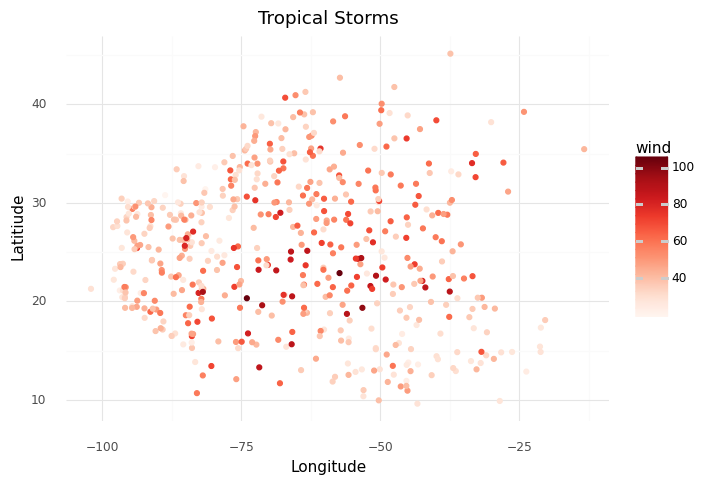

<ggplot: (8786836017631)>

In [137]:
stormlocate = (ggplot(storms, aes('long','lat',color='wind')) + geom_point() + ggtitle('Tropical Storms') +scale_color_cmap(cmap_name='Reds')
 + labs(x='Longitude',y='Latitiude') + theme_minimal() + theme(figure_size=(7,5)))

stormlocate

Caption: 

This scatter plot visualizes average longitude and latitude of observations from the Storms dataset. The shade of the scatter points are colored based on average windspeed in kmph.

I selected the colormap to be Red for this plot because the average windspeed of the tropical storms would be assumed to be on a continuous/non-discrete scale. I chose only one color because there were no particular thresholds of the windspeed of interest, so the only distinction of interest was the continuous differences in the dataset.


### Question 1D:

See code and caption below

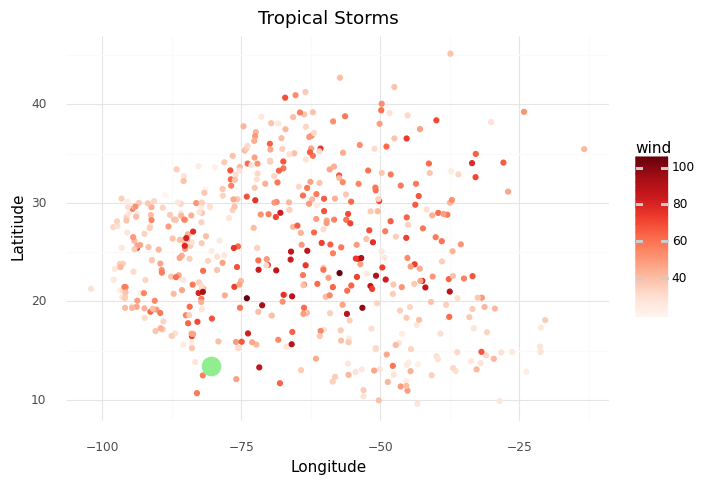

<ggplot: (8786828329515)>

In [135]:
iotalocate = (ggplot(storms, aes('long','lat',color='wind')) + geom_point()
 + geom_point(storms.loc[(storms['name']== 'Iota') & (storms['year']==2020)], color='lightgreen', size = 7)
+ ggtitle('Tropical Storms') +scale_color_cmap(cmap_name='Reds')
 + labs(x='Longitude',y='Latitiude') + theme_minimal() + theme(figure_size=(7,5)))

iotalocate

I chose to highlight my storm, Tropical Storm Iota, from homework 2 in green so that it could stand out from the various alphas of the reds. This is based on color theory of red and green being complimentary colors of each other which creates the most distinction from each other when placed next to each other.

### Question 1E:

See code and caption below

In [47]:
# Sample code from HW2 for proof of path of hurricane

plt.rcdefaults()
sns.scatterplot(x=iota_geo.long,y=iota_geo.lat,color='orange', hue=iota_geo.category, palette='PRGn')
plt.plot(iota_geo.long,iota_geo.lat,color='orange')
sns.scatterplot(x=iota_geo.long,y=iota_geo.lat,s=iota_geo.tropicalstorm_force_diameter*15,alpha=0.3,color='pink')
plt.axis('equal')
plt.title('Path of Hurricane Iota (2020)')
plt.ylabel('Latitude',fontsize=10)
plt.xlabel('Longitude',fontsize=10)
plt.legend(bbox_to_anchor=(1.05,.7, 0.3, 0.2), loc='upper left')
plt.savefig('iota_2020.jpeg',bbox_inches='tight')

NameError: name 'iota_geo' is not defined

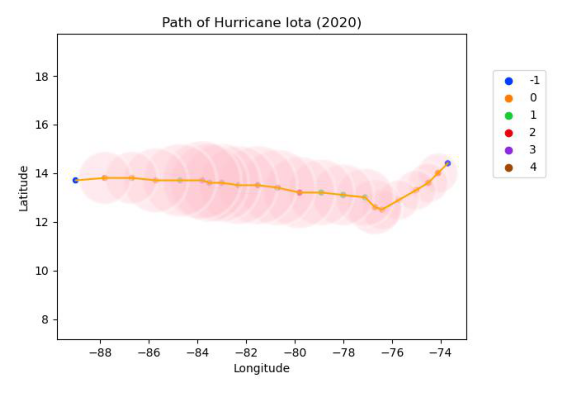

In [48]:
fig,ax = plt.subplots(figsize=(7,7))
image = plt.imread('iota_2020.jpeg')
plt.imshow(image)
ax.set_axis_off()
plt.show()

Caption: 

This graph maps the path of Tropical Storm Iota. Points that are colored in pink have a -1 on the Saffir-Simpson scale and points colored in green have a 0 on the scale. This shows the way in which that Iota moved from a depression at its beginning to a storm and then back down to a depression.

### Question 1F:

See code and caption below

In [49]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_22221/1737354024.py:3: UserWarning: Trying to register the cmap 'custommap' which already exists.


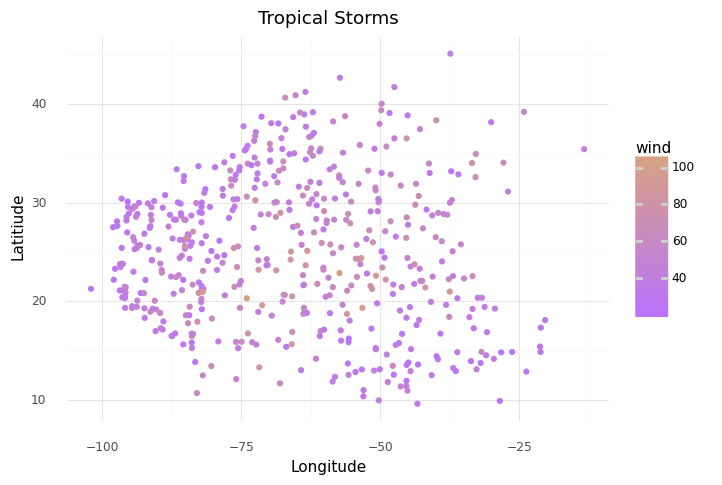

<ggplot: (8786858755497)>

In [50]:
color = ['#ba72fd', "#d6a182"]
custommap = LinearSegmentedColormap.from_list('custommap',color)
plt.register_cmap('custommap', custommap)

stormlocate = (ggplot(storms, aes('long','lat',color='wind')) + geom_point() 
+ ggtitle('Tropical Storms') +scale_color_cmap(cmap_name='custommap')
 + labs(x='Longitude',y='Latitiude') + theme_minimal() + theme(figure_size=(7,5)))

stormlocate

For this custom color palatte I used the colors from dvsn's SEPT5TH album, an album I really like to listen to.

### Question 2:

See code and caption below

In [51]:
vote = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-09/voter_turnout.csv")
vote = vote.drop('Unnamed: 0', axis = 1)
vote.head()


,year,icpsr_state_code,alphanumeric_state_code,state,votes,eligible_voters
0,2014,0,0,United States,83262122.0,227157964
1,2014,41,1,Alabama,1191274.0,3588783
2,2014,81,2,Alaska,285431.0,520562
3,2014,61,3,Arizona,1537671.0,4510186
4,2014,42,4,Arkansas,852642.0,2117881


In [52]:
vote = vote.loc[vote["state"] != "United States"]
vote.head()

,year,icpsr_state_code,alphanumeric_state_code,state,votes,eligible_voters
1,2014,41,1,Alabama,1191274.0,3588783
2,2014,81,2,Alaska,285431.0,520562
3,2014,61,3,Arizona,1537671.0,4510186
4,2014,42,4,Arkansas,852642.0,2117881
5,2014,71,5,California,7513972.0,24440416


In [53]:
vote2014 = vote.loc[vote['year'] == 2014]
vote2014.tail()

,year,icpsr_state_code,alphanumeric_state_code,state,votes,eligible_voters
47,2014,40,47,Virginia,2194346.0,5962456
48,2014,73,48,Washington,2123901.0,4928407
49,2014,56,49,West Virginia,462864.0,1447652
50,2014,25,50,Wisconsin,2422248.0,4260427
51,2014,68,51,Wyoming,171153.0,431434


In [54]:
vote2014 = vote2014[['year', 'state', 'votes', 'eligible_voters']]
vote2014

,year,state,votes,eligible_voters
1,2014,Alabama,1191274.0,3588783
2,2014,Alaska,285431.0,520562
3,2014,Arizona,1537671.0,4510186
4,2014,Arkansas,852642.0,2117881
5,2014,California,7513972.0,24440416
6,2014,Colorado,2080071.0,3800664
7,2014,Connecticut,1096556.0,2577311
8,2014,Delaware,238110.0,681526
9,2014,District of Columbia,177176.0,495899
10,2014,Florida,6026802.0,13914216


In [55]:
vote2014.shape

(51, 4)

In [56]:
vote2014.isnull().sum().sum()

3

In [57]:
vote2014['votes'].isnull().sum()

3

In [58]:
# creating new dataframe to calculate the percentage of eligible voters that voted in 2014 in each state
voters = vote2014['votes']
elig_vote = vote2014['eligible_voters']
pop_percent_vote = (voters/elig_vote)*100
pop_percent_vote.head()

1    33.194373
2    54.831317
3    34.093295
4    40.259202
5    30.744043
dtype: float64

In [59]:
len(pop_percent_vote)

51

In [60]:
vote2014['pop_percent'] = np.array(pop_percent_vote)
vote2014

,year,state,votes,eligible_voters,pop_percent
1,2014,Alabama,1191274.0,3588783,33.194373
2,2014,Alaska,285431.0,520562,54.831317
3,2014,Arizona,1537671.0,4510186,34.093295
4,2014,Arkansas,852642.0,2117881,40.259202
5,2014,California,7513972.0,24440416,30.744043
6,2014,Colorado,2080071.0,3800664,54.729147
7,2014,Connecticut,1096556.0,2577311,42.546515
8,2014,Delaware,238110.0,681526,34.937772
9,2014,District of Columbia,177176.0,495899,35.728243
10,2014,Florida,6026802.0,13914216,43.313989


In [122]:

print(vote2014['pop_percent'].max())
print(vote2014['pop_percent'].min())


58.67451788157941
28.732148810127732


In [35]:
pip install geopandas

     |████████████████████████████████| 1.1 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 29.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
import sys
'geopandas' in sys.modules

True

In [62]:
import geopandas as gp

In [104]:
file = gp.read_file("/Users/keeganballantyne/downloads/data/state.shp")
file

,STFIPS,STATE,STPOSTAL,DotRegion,geometry
0,54,West Virginia,WV,3,"POLYGON ((-79.47667 39.72109, -79.47667 39.720..."
1,12,Florida,FL,4,"MULTIPOLYGON (((-81.96339 24.52110, -81.96375 ..."
2,17,Illinois,IL,5,"POLYGON ((-87.80189 42.49225, -87.80189 42.492..."
3,27,Minnesota,MN,5,"MULTIPOLYGON (((-92.20829 46.65204, -92.21420 ..."
4,24,Maryland,MD,3,"MULTIPOLYGON (((-76.23672 37.88869, -76.23674 ..."
5,44,Rhode Island,RI,1,"MULTIPOLYGON (((-71.56863 41.22551, -71.56779 ..."
6,16,Idaho,ID,10,"POLYGON ((-116.04921 49.00091, -116.04921 49.0..."
7,33,New Hampshire,NH,1,"MULTIPOLYGON (((-70.73513 42.87509, -70.73501 ..."
8,37,North Carolina,NC,4,"MULTIPOLYGON (((-77.95795 33.83439, -77.95816 ..."
9,50,Vermont,VT,1,"POLYGON ((-71.50108 45.01336, -71.50097 45.013..."


In [106]:
state_table = pd.merge(file, vote2014, left_on=['STATE'],right_on=['state'])
state_table.shape

(51, 10)

In [107]:
state_table

,STFIPS,STATE,STPOSTAL,DotRegion,geometry,year,state,votes,eligible_voters,pop_percent
0,54,West Virginia,WV,3,"POLYGON ((-79.47667 39.72109, -79.47667 39.720...",2014,West Virginia,462864.0,1447652,31.973430
1,12,Florida,FL,4,"MULTIPOLYGON (((-81.96339 24.52110, -81.96375 ...",2014,Florida,6026802.0,13914216,43.313989
2,17,Illinois,IL,5,"POLYGON ((-87.80189 42.49225, -87.80189 42.492...",2014,Illinois,3680417.0,9028752,40.763297
3,27,Minnesota,MN,5,"MULTIPOLYGON (((-92.20829 46.65204, -92.21420 ...",2014,Minnesota,1992613.0,3935121,50.636639
4,24,Maryland,MD,3,"MULTIPOLYGON (((-76.23672 37.88869, -76.23674 ...",2014,Maryland,1745104.0,4154546,42.004686
5,44,Rhode Island,RI,1,"MULTIPOLYGON (((-71.56863 41.22551, -71.56779 ...",2014,Rhode Island,329212.0,776286,42.408597
6,16,Idaho,ID,10,"POLYGON ((-116.04921 49.00091, -116.04921 49.0...",2014,Idaho,445307.0,1119882,39.763743
7,33,New Hampshire,NH,1,"MULTIPOLYGON (((-70.73513 42.87509, -70.73501 ...",2014,New Hampshire,495565.0,1025862,48.307180
8,37,North Carolina,NC,4,"MULTIPOLYGON (((-77.95795 33.83439, -77.95816 ...",2014,North Carolina,2939767.0,7143737,41.151669
9,50,Vermont,VT,1,"POLYGON ((-71.50108 45.01336, -71.50097 45.013...",2014,Vermont,202445.0,495884,40.825072


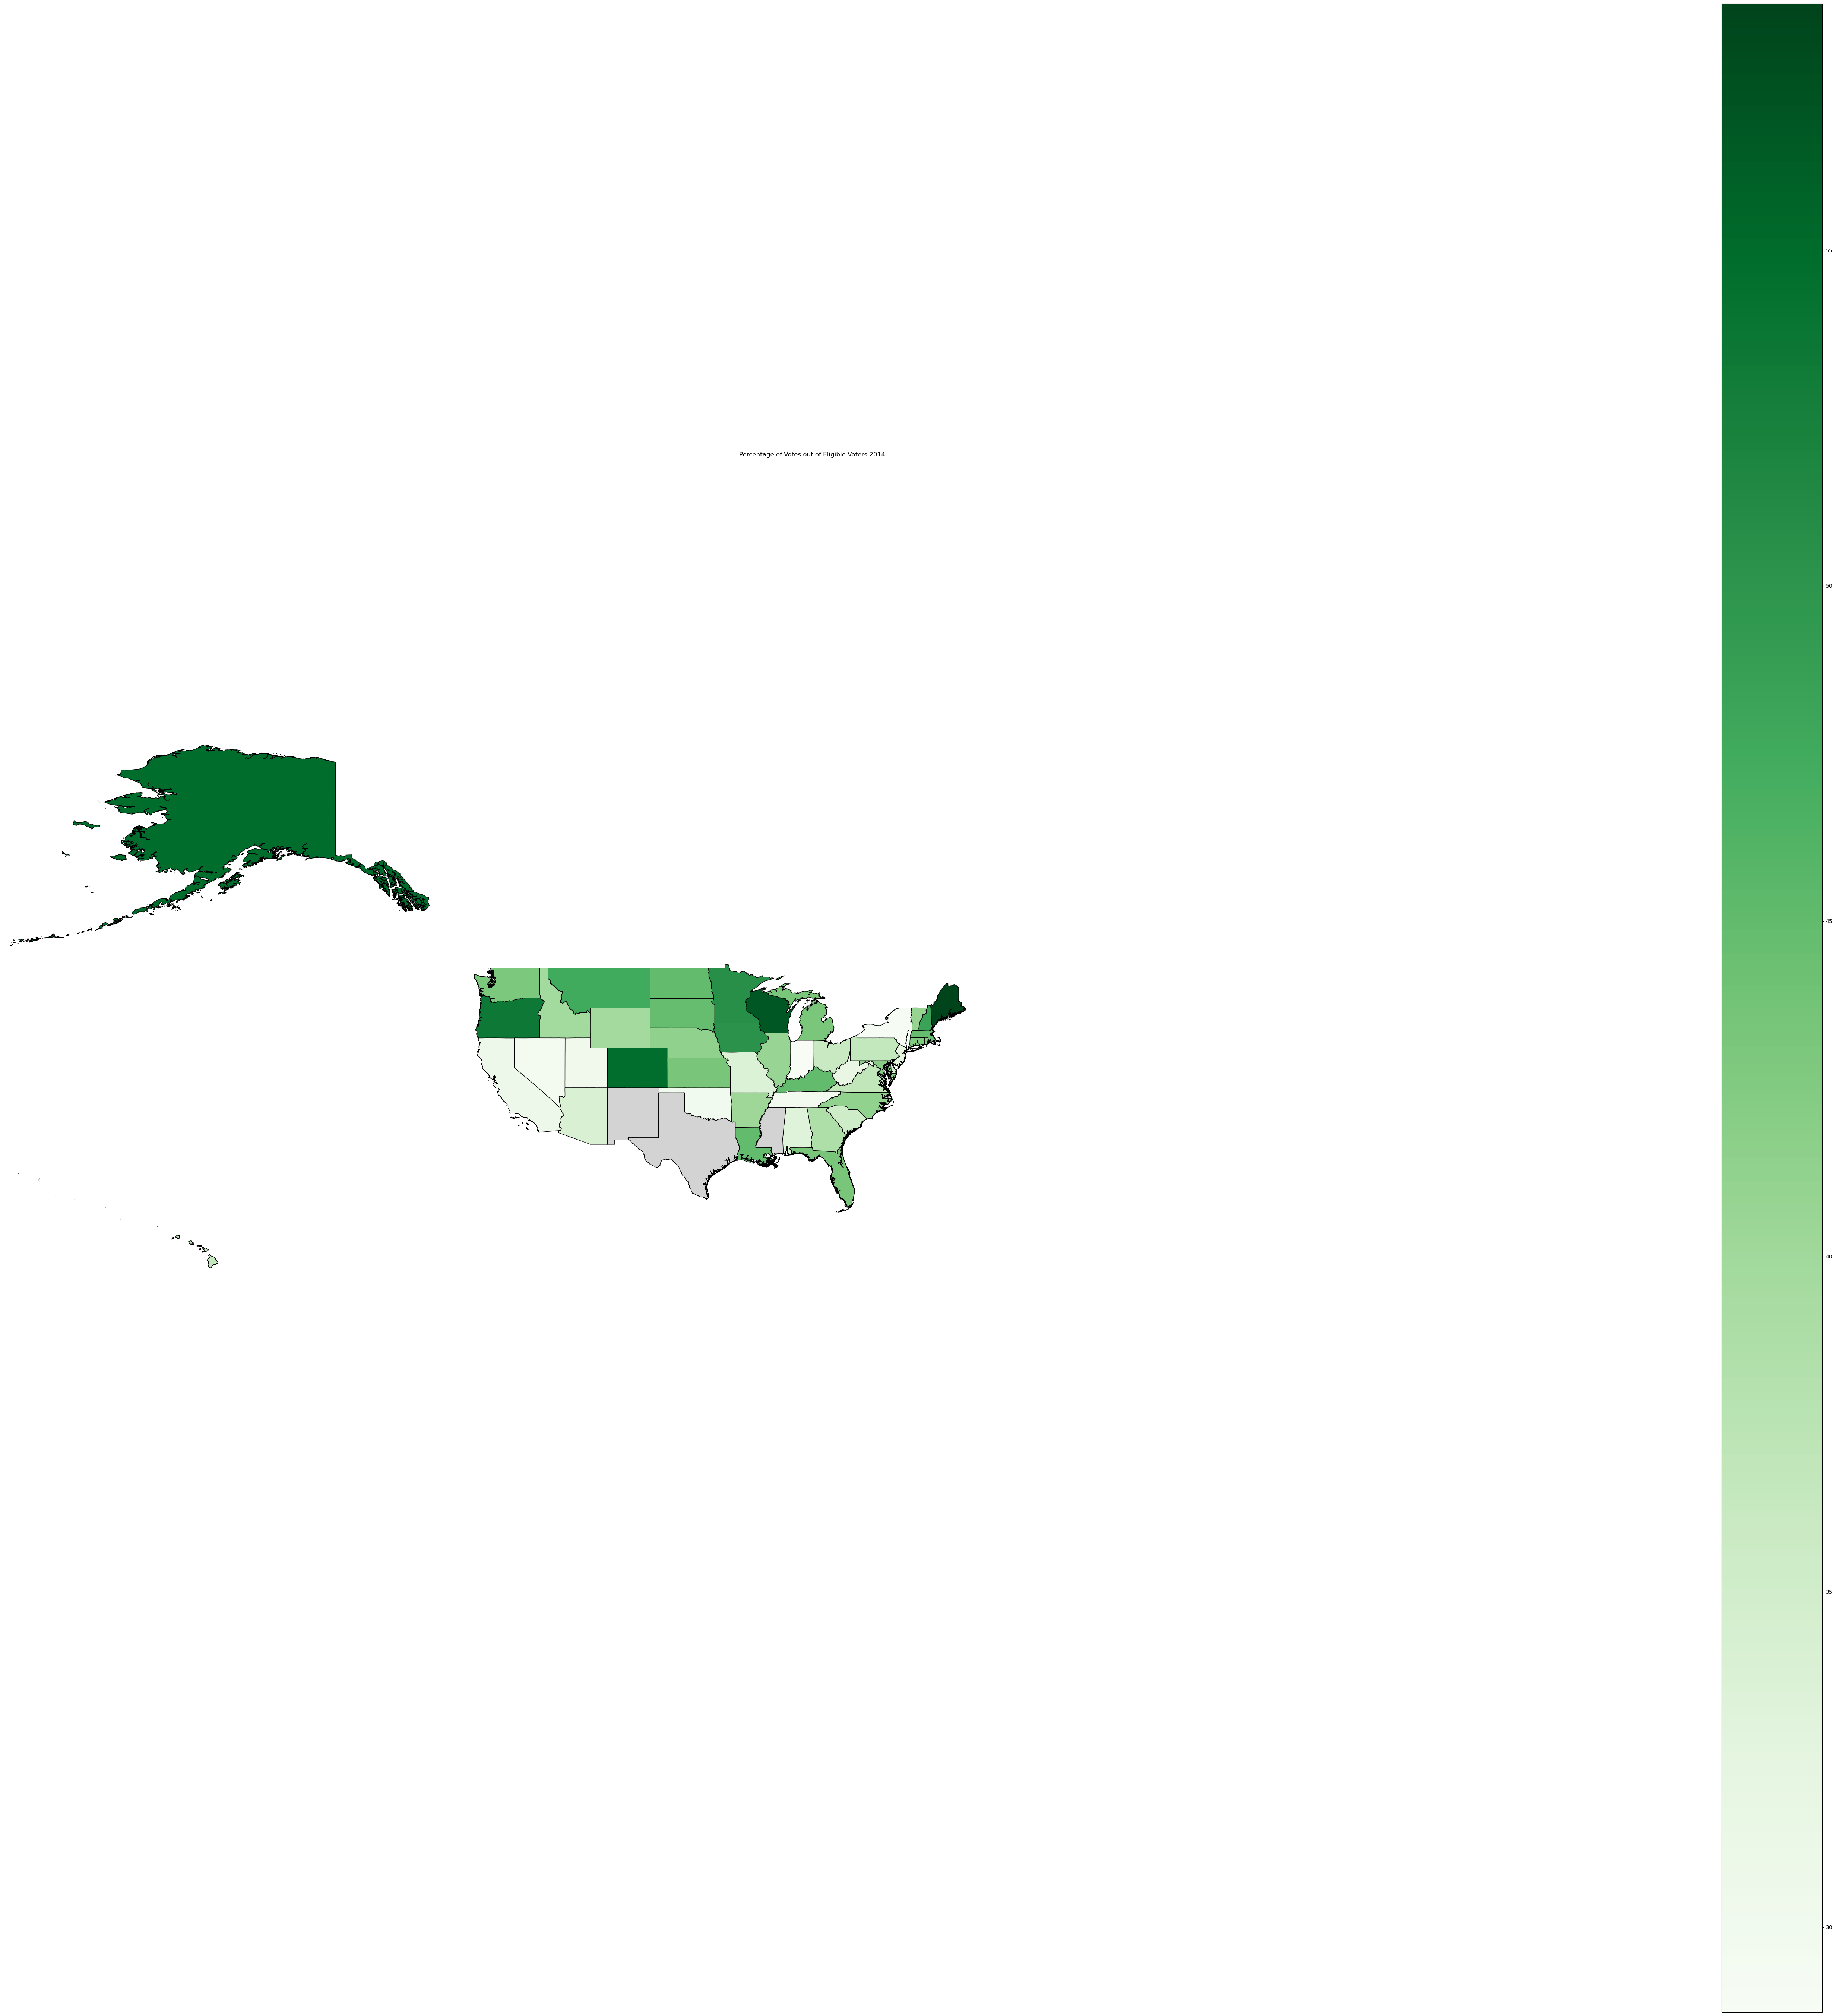

In [138]:
fig, ax = plt.subplots(figsize=(70,70))
state_table.plot(ax=ax, column='pop_percent',cmap='Greens', missing_kwds={'color': 'lightgrey'}, edgecolor="black", 
                 legend=True)
plt.title('Percentage of Votes out of Eligible Voters 2014',fontsize=12)
# minx, miny, maxx, maxy = state_table.total_bounds
ax.set_xlim(-180, 10)
ax.set_ylim(-10, 100)
ax.set_axis_off()

Caption: Percentage voter turnout for the 2014 election cycle in each state, per data from the Data World compiled by Carl V. Lewis https://data.world/carlvlewis/voter-registration-and-criminal-records-by-state-1980-2014. Note: Texas, New Mexico, and Mississippi are greyed out due to missing data.

Paragraph:
    This heatmap represents the percentage number of votes that were casted out of the total number of eligible voters in each state in the 2014 election with a maximum percentage of votes casted being at 58% in Maine and the minimum percentage of votes casted in Indiana at 28%. Other states that included higher voting percentages according to this heatmap included Alaska, Colarado, Oregon, and Wisconsin whereas states that had some of the lowest voting percentages included New York, Nevada, Utah, and Tennessee. States that are shaded grey are states that did not submit voter turnout data in this data set. These lower voter turnout may be in cause due by the circumstances of this election cycle being a midterm election cycle, or in other words this election cycle was not a presidential election cycle. Perhaps this turnout data may appear differently in a presidential election. This, however, may underscore a need for initiatives to increase voter turnout and voter efficcacy during non-presidential elections for other elections that are important such as federal legislative, state, and local elections.  